In [1]:
import import_ipynb
import config
from train import Train_Model
from dataloader import train_dataloader, val_dataloader, get_dataset
from torchvision import transforms as T

importing Jupyter notebook from config.ipynb
importing Jupyter notebook from train.ipynb
importing Jupyter notebook from plotting.ipynb
importing Jupyter notebook from models.ipynb
importing Jupyter notebook from resnet_utils.ipynb
importing Jupyter notebook from dataloader.ipynb
importing Jupyter notebook from specaugment.ipynb
importing Jupyter notebook from focalloss.ipynb


In [2]:
def main(conf):
    #resizing the images and turning them to tensors
    transform1 = T.Compose([T.Resize(224),
                            T.ToTensor()])
    #turning the 1 channel image to a 3 channel image and normalizing the image  
    transform2= T.Compose([T.Lambda(lambda x: x.repeat(3, 1, 1)),
                           T.Normalize(mean=[0.485, 0.456, 0.406], 
                                       std=[0.229, 0.224, 0.225])])
    #create a dataloader for training 
    train_loader = train_dataloader(conf.AUDIO_DIR,
                                    conf.TRAIN_ANN_FILE,
                                    conf.dataAugment,
                                    conf.batch_size)
    #create a dataloader for Validating
    val_loader = val_dataloader(conf.AUDIO_DIR,
                                conf.VAL_ANN_FILE,
                                False,
                                conf.batch_size)
    #get the test set
    test_set = get_dataset(conf.AUDIO_DIR,
                           conf.VAL_ANN_FILE,
                           False,
                           transform1,
                           transform2)

    train_model = Train_Model(conf, train_loader, val_loader, conf.model)# the a object for training the model
    train_model.train()# train the model
    train_model.test(test_set) # test the model

VGG !!!
VGGish(
  (layer_norm): LayerNorm((3, 242, 224), eps=1e-05, elementwise_affine=True)
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Con

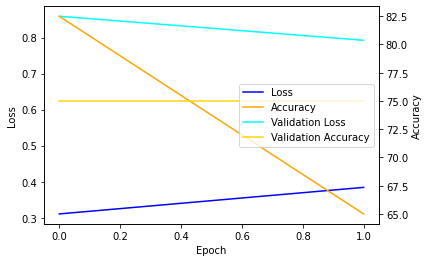

Accuracy:  0.678
263 of 388
Accuracy for Croak:  0.472
25 of 53
Accuracy for Groan:  0.000
0 of 18
Accuracy for Growl:  0.627
32 of 51
Accuracy for Moan:  0.761
51 of 67
Accuracy for Rumble:  0.206
7 of 34
Accuracy for Whoops:  0.807
71 of 88
Accuracy for Other:  1.000
77 of 77


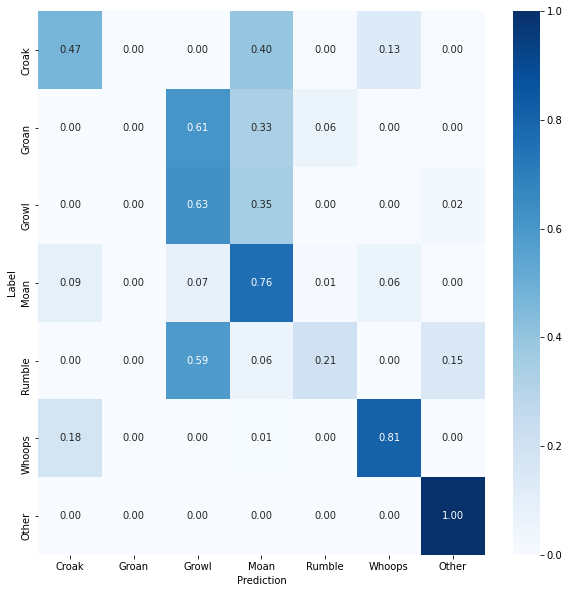

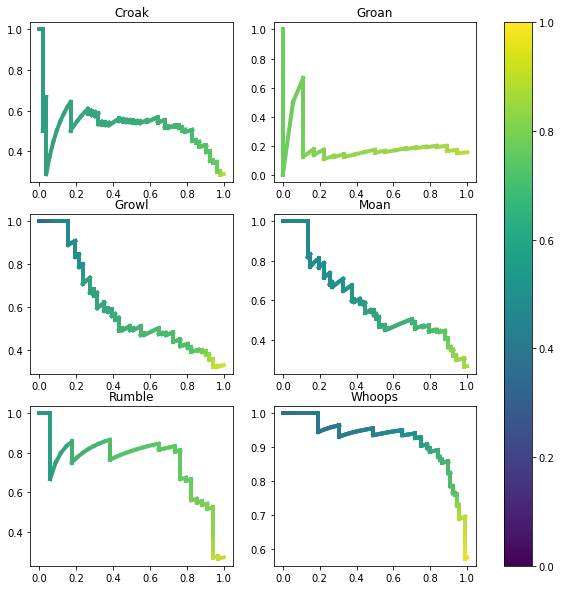

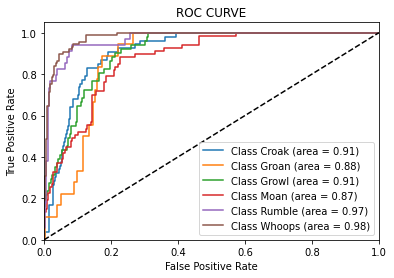

In [3]:
if __name__ == "__main__":

    config_object = config.Config()
    main(config_object)